In [ ]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id='1Ap3pmeSdgQUEHXaNcUB3kxGZVTwjXHY8'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_labels.csv')

In [ ]:
train_labels = pd.read_csv('train_labels.csv', index_col='building_id')
train_labels.tail()

,damage_grade
building_id,
688636,2
669485,3
602512,3
151409,2
747594,3


In [ ]:
id='1EBZj8ChDcTigwwL7E7FPLGqYmvNGAanY'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_values.csv')

In [ ]:
train_values = pd.read_csv('train_values.csv', index_col='building_id')
train_values

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_values.sum()

geo_level_1_id                                                                      3622446
geo_level_2_id                                                                    182700764
geo_level_3_id                                                                   1630808782
count_floors_pre_eq                                                                  555008
age                                                                                 6915055
area_percentage                                                                     2089512
height_percentage                                                                   1416201
land_surface_condition                    tottttnttttttttntttttttntttntttttttttttttttttn...
foundation_type                           rrrrrrrwrirurrrrrrurrrrrrrrurrrwrrhrrrrrrurrri...
roof_type                                 nnnnnnnqqnqnnqnnnnnnnnqqnqnqnnnqnnnqqqnqnqnqnx...
ground_floor_type                         fxffffxvfvfvxfffffvffffffffffffvffffff

In [ ]:
train_values.dtypes

geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_cement_mortar_brick     int64
has_superstructure_t

#Feature engineering

In [ ]:
train_values.age.value_counts()

10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
995     1390
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
140        9
130        9
180        7
160        6
170        6
175        5
135        5
145        3
190        3
195        2
165        2
155        1
185        1
Name: age, dtype: int64

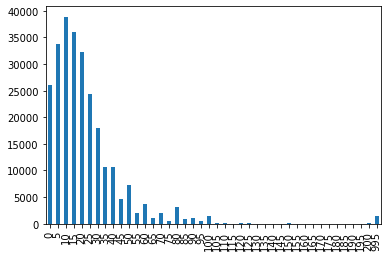

In [ ]:
train_values.age.value_counts().sort_index().plot.bar()

In [ ]:
train_values['other_floor_type'].value_counts()

q    165282
x     43448
j     39843
s     12028
Name: other_floor_type, dtype: int64

In [ ]:
train_values['plan_configuration'].value_counts()

d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: int64

In [ ]:
train_values[['has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag',\
                     'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick',\
                     'has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered','has_superstructure_rc_engineered',\
                     'has_superstructure_other']].sum()

has_superstructure_adobe_mud               23101
has_superstructure_mud_mortar_stone       198561
has_superstructure_stone_flag               8947
has_superstructure_cement_mortar_stone      4752
has_superstructure_mud_mortar_brick        17761
has_superstructure_cement_mortar_brick     19615
has_superstructure_timber                  66450
has_superstructure_bamboo                  22154
has_superstructure_rc_non_engineered       11099
has_superstructure_rc_engineered            4133
has_superstructure_other                    3905
dtype: int64

In [ ]:
train_values['count_families'].value_counts()

1    226115
0     20862
2     11294
3      1802
4       389
5       104
6        22
7         7
9         4
8         2
Name: count_families, dtype: int64

In [ ]:
train_values_subset = train_values

In [ ]:
#train_values_subset = pd.get_dummies(train_values_subset)

In [ ]:
train_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,2,0,1.200000,30
28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,56,1,0,1.142857,10
94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,25,1,0,1.000000,10
590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,1,0,1.200000,10
201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,72,1,0,0.888889,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,18,1,0,2.000000,55
669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,1,0,1.200000,0
602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,42,1,0,0.857143,55


##Agregamos columnas


Verificamos que no haya edificios duplicados y nulos

In [ ]:
train_values_subset.reset_index()['building_id'].drop_duplicates()

0         802906
1          28830
2          94947
3         590882
4         201944
           ...  
260596    688636
260597    669485
260598    602512
260599    151409
260600    747594
Name: building_id, Length: 260601, dtype: int64

In [ ]:
train_values_subset.dropna()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,2,0,1.200000,30
28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,56,1,0,1.142857,10
94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,25,1,0,1.000000,10
590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,1,0,1.200000,10
201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,72,1,0,0.888889,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,18,1,0,2.000000,55
669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,1,0,1.200000,0
602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,42,1,0,0.857143,55


In [ ]:
train_values_subset['volumen'] = train_values_subset['area_percentage']*train_values_subset['height_percentage']

In [ ]:
train_values.sum()

geo_level_1_id                                                                      3622446
geo_level_2_id                                                                    182700764
geo_level_3_id                                                                   1630808782
count_floors_pre_eq                                                                  555008
age                                                                                 6915055
area_percentage                                                                     2089512
height_percentage                                                                   1416201
land_surface_condition                    tottttnttttttttntttttttntttntttttttttttttttttn...
foundation_type                           rrrrrrrwrirurrrrrrurrrrrrrrurrrwrrhrrrrrrurrri...
roof_type                                 nnnnnnnqqnqnnqnnnnnnnnqqnqnqnnnqnnnqqqnqnqnqnx...
ground_floor_type                         fxffffxvfvfvxfffffvffffffffffffvffffff

In [ ]:
train_values_subset['combinacion_materiales']=train_values_subset.iloc[:,7:18].sum(axis=1)

In [ ]:
train_values_subset.sum()

geo_level_1_id                                                                      3622446
geo_level_2_id                                                                    182700764
geo_level_3_id                                                                   1630808782
count_floors_pre_eq                                                                  555008
age                                                                                 6915055
area_percentage                                                                     2089512
height_percentage                                                                   1416201
land_surface_condition                    tottttnttttttttntttttttntttntttttttttttttttttn...
foundation_type                           rrrrrrrwrirurrrrrrurrrrrrrrurrrwrrhrrrrrrurrri...
roof_type                                 nnnnnnnqqnqnnqnnnnnnnnqqnqnqnnnqnnnqqqnqnqnqnx...
ground_floor_type                         fxffffxvfvfvxfffffvffffffffffffvffffff

In [ ]:
train_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,2,0,1.200000,30
28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,56,1,0,1.142857,10
94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,25,1,0,1.000000,10
590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,1,0,1.200000,10
201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,72,1,0,0.888889,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,18,1,0,2.000000,55
669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,1,0,1.200000,0
602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,42,1,0,0.857143,55


In [ ]:
train_values_subset['combinacion_usos'] = train_values['has_secondary_use_agriculture']+\
train_values['has_secondary_use_hotel']+train_values['has_secondary_use_rental']+train_values['has_secondary_use_institution']+\
train_values['has_secondary_use_school']+train_values['has_secondary_use_industry']+\
train_values['has_secondary_use_health_post']+train_values['has_secondary_use_gov_office']+\
train_values['has_secondary_use_use_police']+train_values['has_secondary_use_other']

In [ ]:
train_values_subset['area/altura'] = train_values_subset['area_percentage']/train_values_subset['height_percentage']

In [ ]:
train_values_subset['combinacion_usos'].sum()

29713

In [ ]:
train_values_subset['antiguedad_material'] = train_values_subset['age']*train_values_subset['has_superstructure_mud_mortar_stone']

In [ ]:
train_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,2,0,1.200000,30
28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,56,1,0,1.142857,10
94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,25,1,0,1.000000,10
590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,1,0,1.200000,10
201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,72,1,0,0.888889,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,18,1,0,2.000000,55
669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,1,0,1.200000,0
602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,42,1,0,0.857143,55


#Mas Features

In [ ]:
p1 = train_values_subset.groupby(['geo_level_1_id'])['has_superstructure_mud_mortar_stone'].agg('mean')
train_values_subset = pd.merge(train_values_subset, p1.reset_index(),suffixes=["","_geo_level_1"], how='left', on=['geo_level_1_id'])

In [ ]:
p2 = train_values_subset.groupby(['geo_level_2_id'])['has_superstructure_mud_mortar_stone'].agg('mean')
train_values_subset = pd.merge(train_values_subset, p2.reset_index(),suffixes=["","_geo_level_2"], how='left', on=['geo_level_2_id'])

In [ ]:
p3 = train_values_subset.groupby(['geo_level_3_id'])['has_superstructure_mud_mortar_stone'].agg('mean')
train_values_subset = pd.merge(train_values_subset, p3.reset_index(),suffixes=["","_geo_level_3"], how='left', on=['geo_level_3_id'])

In [ ]:
train_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material,has_superstructure_mud_mortar_stone_geo_level_1,has_superstructure_mud_mortar_stone_geo_level_2,has_superstructure_mud_mortar_stone_geo_level_3
0,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,2,0,1.200000,30,0.748083,0.900000,0.864865
1,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,56,1,0,1.142857,10,0.906184,0.974874,0.937500
2,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,25,1,0,1.000000,10,0.960508,0.840341,0.933824
3,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,1,0,1.200000,10,0.889155,0.970732,0.903226
4,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,72,1,0,0.888889,0,0.426034,0.356455,0.581967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,18,1,0,2.000000,55,0.894026,0.974138,1.000000
260597,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,1,0,1.200000,0,0.928666,0.965517,1.000000
260598,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,42,1,0,0.857143,55,0.928666,0.927928,0.954545
260599,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,84,0,0,2.333333,0,0.460049,0.039624,0.076271


In [ ]:
a1 = train_values_subset.groupby(['geo_level_1_id'])['age'].agg('median')
train_values_subset = pd.merge(train_values_subset, a1.reset_index(), suffixes=["", "_geo_level_id1"], how='left', on=['geo_level_1_id'])

In [ ]:
train_values_subset['age_geo_level_id1'].value_counts()

15    129748
20     55331
10     43789
30     28292
25      3441
Name: age_geo_level_id1, dtype: int64

In [ ]:
a2 = train_values_subset.groupby(['geo_level_2_id'])['age'].agg('median')
train_values_subset = pd.merge(train_values_subset, a2.reset_index(), suffixes=["", "_geo_level_id2"], how='left', on=['geo_level_2_id'])

In [ ]:
train_values_subset['age_geo_level_id2'].value_counts()

15.0     91064
20.0     68530
10.0     45996
25.0     27556
5.0       6287
60.0      5827
30.0      4357
35.0      3589
45.0      1958
22.5      1694
17.5      1284
12.5       658
40.0       340
27.5       290
32.5       242
995.0      205
50.0       185
80.0       173
47.5       110
55.0        75
0.0         57
95.0        49
37.5        38
42.5        34
7.5          2
100.0        1
Name: age_geo_level_id2, dtype: int64

In [ ]:
a3 = train_values_subset.groupby(['geo_level_3_id'])['age'].agg('median')
train_values_subset = pd.merge(train_values_subset, a3.reset_index(), suffixes=["", "_geo_level_id3"], how='left', on=['geo_level_3_id'])

In [ ]:
train_values_subset['age_geo_level_id3'].value_counts()

15.0     65336
20.0     55131
10.0     49929
25.0     27351
5.0      13091
30.0     11125
17.5      6908
12.5      5264
22.5      4030
35.0      3565
40.0      2396
27.5      2186
7.5       1846
50.0      1779
45.0      1471
80.0      1187
60.0      1120
32.5      1040
90.0       908
995.0      606
37.5       576
100.0      536
42.5       428
75.0       395
55.0       393
65.0       334
0.0        311
85.0       292
70.0       250
62.5       194
52.5       188
47.5       140
95.0       137
57.5        62
2.5         34
550.0        8
200.0        7
72.5         6
82.5         6
67.5         6
500.0        4
532.5        4
105.0        3
502.5        2
497.5        2
545.0        2
102.5        2
522.5        2
507.5        2
77.5         2
515.0        2
510.0        2
Name: age_geo_level_id3, dtype: int64

In [ ]:
train_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material,has_superstructure_mud_mortar_stone_geo_level_1,has_superstructure_mud_mortar_stone_geo_level_2,has_superstructure_mud_mortar_stone_geo_level_3,age_geo_level_id1,age_geo_level_id2,age_geo_level_id3
0,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,2,0,1.200000,30,0.748083,0.900000,0.864865,20,20.0,20.0
1,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,56,1,0,1.142857,10,0.906184,0.974874,0.937500,15,15.0,10.0
2,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,25,1,0,1.000000,10,0.960508,0.840341,0.933824,15,15.0,20.0
3,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,1,0,1.200000,10,0.889155,0.970732,0.903226,20,20.0,15.0
4,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,72,1,0,0.888889,0,0.426034,0.356455,0.581967,30,30.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,18,1,0,2.000000,55,0.894026,0.974138,1.000000,20,20.0,17.5
260597,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,1,0,1.200000,0,0.928666,0.965517,1.000000,15,15.0,15.0
260598,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,42,1,0,0.857143,55,0.928666,0.927928,0.954545,15,20.0,25.0
260599,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,84,0,0,2.333333,0,0.460049,0.039624,0.076271,10,10.0,15.0


In [ ]:
v1 = train_values_subset.groupby(['geo_level_1_id'])['volumen'].agg('median')
train_values_subset = pd.merge(train_values_subset, v1.reset_index(), suffixes=["", "_geo_level_id1"], how='left', on=['geo_level_1_id'])

In [ ]:
v2 = train_values_subset.groupby(['geo_level_2_id'])['volumen'].agg('median')
train_values_subset = pd.merge(train_values_subset, v2.reset_index(), suffixes=["", "_geo_level_id2"], how='left', on=['geo_level_2_id'])

In [ ]:
v3 = train_values_subset.groupby(['geo_level_3_id'])['volumen'].agg('median')
train_values_subset = pd.merge(train_values_subset, v3.reset_index(), suffixes=["", "_geo_level_id3"], how='left', on=['geo_level_3_id'])

In [ ]:
train_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material,has_superstructure_mud_mortar_stone_geo_level_1,has_superstructure_mud_mortar_stone_geo_level_2,has_superstructure_mud_mortar_stone_geo_level_3,age_geo_level_id1,age_geo_level_id2,age_geo_level_id3,volumen_geo_level_id1,volumen_geo_level_id2,volumen_geo_level_id3
0,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,2,0,1.200000,30,0.748083,0.900000,0.864865,20,20.0,20.0,45.0,36.0,35.0
1,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,56,1,0,1.142857,10,0.906184,0.974874,0.937500,15,15.0,10.0,36.0,36.0,56.0
2,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,25,1,0,1.000000,10,0.960508,0.840341,0.933824,15,15.0,20.0,36.0,42.0,58.5
3,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,1,0,1.200000,10,0.889155,0.970732,0.903226,20,20.0,15.0,35.0,15.0,40.0
4,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,72,1,0,0.888889,0,0.426034,0.356455,0.581967,30,30.0,30.0,49.0,48.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,18,1,0,2.000000,55,0.894026,0.974138,1.000000,20,20.0,17.5,33.0,21.0,24.0
260597,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,30,1,0,1.200000,0,0.928666,0.965517,1.000000,15,15.0,15.0,40.0,48.0,56.0
260598,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,42,1,0,0.857143,55,0.928666,0.927928,0.954545,15,20.0,25.0,40.0,35.0,37.5
260599,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,84,0,0,2.333333,0,0.460049,0.039624,0.076271,10,10.0,15.0,35.0,51.0,51.0


#CatBoost default

In [ ]:
pip install catboost

     |████████████████████████████████| 69.2 MB 4.4 kB/s 


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_values_subset, train_labels, test_size=0.3, random_state=2018)

In [ ]:
categorical_features_indices = np.where(X_train.dtypes =='object')[0]

In [ ]:
import catboost as cb
clf_d = cb.CatBoostClassifier()
clf_d.fit(X_train, y_train,cat_features=categorical_features_indices)

Learning rate set to 0.10319
0:	learn: 1.0369237	total: 1.25s	remaining: 20m 49s
1:	learn: 0.9899830	total: 2.48s	remaining: 20m 36s
2:	learn: 0.9503098	total: 3.78s	remaining: 20m 57s
3:	learn: 0.9167196	total: 4.78s	remaining: 19m 49s
4:	learn: 0.8896963	total: 5.79s	remaining: 19m 13s
5:	learn: 0.8661037	total: 6.79s	remaining: 18m 45s
6:	learn: 0.8451460	total: 7.98s	remaining: 18m 52s
7:	learn: 0.8278138	total: 9.13s	remaining: 18m 51s
8:	learn: 0.8126913	total: 10.3s	remaining: 18m 55s
9:	learn: 0.7996762	total: 11.5s	remaining: 18m 59s
10:	learn: 0.7876806	total: 12.7s	remaining: 18m 58s
11:	learn: 0.7779005	total: 13.8s	remaining: 18m 56s
12:	learn: 0.7692781	total: 14.9s	remaining: 18m 47s
13:	learn: 0.7620068	total: 16s	remaining: 18m 47s
14:	learn: 0.7553523	total: 17.1s	remaining: 18m 44s
15:	learn: 0.7494032	total: 18.3s	remaining: 18m 45s
16:	learn: 0.7442560	total: 19.4s	remaining: 18m 40s
17:	learn: 0.7396038	total: 20.5s	remaining: 18m 36s
18:	learn: 0.7354845	total: 2

In [ ]:
from sklearn.metrics import f1_score

preds = clf_d.predict(X_test)
f1_score(y_test, preds, average='micro')

0.7360739821695809

En Driven Data: 0,7160

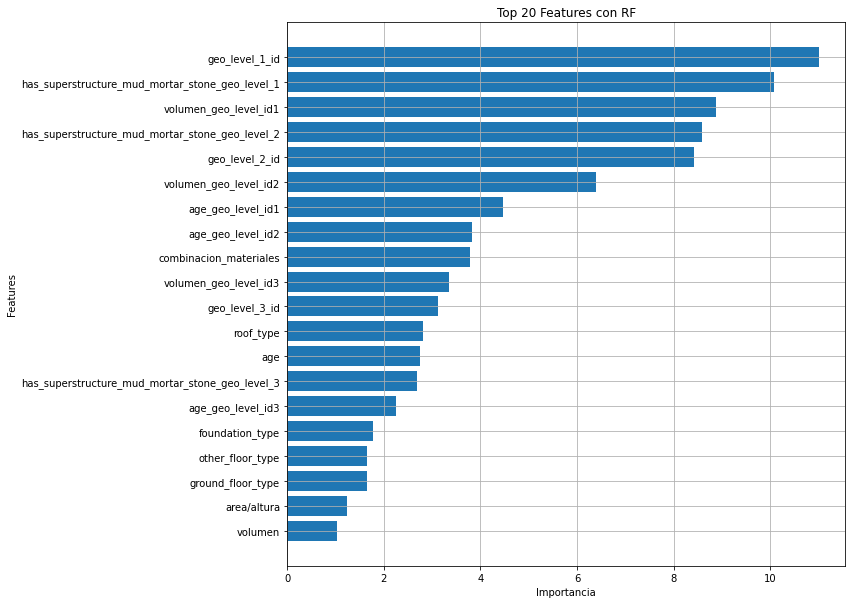

In [ ]:
sorted_idx = clf_d.feature_importances_.argsort()
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.barh(X_train.columns[sorted_idx][32:52], clf_d.feature_importances_[sorted_idx][32:52])
#plt.xticks(rotation=90)
plt.xlabel('Importancia')
plt.ylabel('Features')
plt.title('Top 20 Features con RF')
plt.grid(True)
plt.show()

#Catboost con GridSearch

In [ ]:
pip install catboost

     |████████████████████████████████| 69.2 MB 4.4 kB/s 


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_values_subset, train_labels, test_size=0.3, random_state=2018)

In [ ]:
categorical_features_indices = np.where(X_train.dtypes =='object')[0]

In [ ]:
import catboost as cb
from sklearn.model_selection import train_test_split, GridSearchCV
params = {'depth': [4, 7, 10],
          'learning_rate': [0.03, 0.1, 0.15],
          'l2_leaf_reg': [1, 4, 9],
          'iterations': [300, 500],}
cb = cb.CatBoostClassifier()
cb_model = GridSearchCV(cb, params, scoring="f1_micro", cv=3)
cb_model.fit(X_train, y_train)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Se truncaron las últimas líneas 5000 del resultado de transmisión.
0:	learn: 1.0797725	total: 430ms	remaining: 3m 34s
1:	learn: 1.0617724	total: 861ms	remaining: 3m 34s
2:	learn: 1.0450625	total: 1.3s	remaining: 3m 34s
3:	learn: 1.0293110	total: 1.74s	remaining: 3m 35s
4:	learn: 1.0143529	total: 2.2s	remaining: 3m 37s
5:	learn: 1.0008175	total: 2.65s	remaining: 3m 37s
6:	learn: 0.9876830	total: 3.09s	remaining: 3m 37s
7:	learn: 0.9751655	total: 3.54s	remaining: 3m 37s
8:	learn: 0.9633926	total: 3.98s	remaining: 3m 36s
9:	learn: 0.9519086	total: 4.42s	remaining: 3m 36s
10:	learn: 0.9413869	total: 4.89s	remaining: 3m 37s
11:	learn: 0.9315677	total: 5.34s	remaining: 3m 37s
12:	learn: 0.9217864	total: 5.77s	remaining: 3m 36s
13:	learn: 0.9125229	total: 6.21s	remaining: 3m 35s
14:	learn: 0.9036800	total: 6.66s	remaining: 3m 35s
15:	learn: 0.8953673	total: 7.1s	remaining: 3m 34s
16:	learn: 0.8872141	total: 7.55s	remaining: 3m 34s
17:	learn: 0.8794940	total: 7.99s	remaining: 3m 34s
18:	learn:

GridSearchCV(cv=3, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fd286291810>,
             iid='deprecated', n_jobs=None,
             param_grid={'depth': [4, 7, 10], 'iterations': [300, 500],
                         'l2_leaf_reg': [1, 4, 9],
                         'learning_rate': [0.03, 0.1, 0.15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_micro', verbose=0)

In [ ]:
cb_model.best_score_

0.7413605887473063

In [ ]:
cb_model.best_params_

{'depth': 10, 'iterations': 500, 'l2_leaf_reg': 9, 'learning_rate': 0.15}

In [ ]:
categorical_features_indices = np.where(X_train.dtypes =='object')[0]

In [ ]:
#Entreno con los mejores parametros que me dio el grid search
import catboost as cb
cb_clf = cb.CatBoostClassifier(eval_metric="TotalF1", depth=10, iterations=500, l2_leaf_reg=9,
                            learning_rate=0.15, loss_function='MultiClass')

cb_clf.fit(X_train, y_train,cat_features=categorical_features_indices)

0:	learn: 0.6481072	total: 2.61s	remaining: 21m 41s
1:	learn: 0.6486144	total: 5.29s	remaining: 21m 58s
2:	learn: 0.6503002	total: 7.9s	remaining: 21m 48s
3:	learn: 0.6552884	total: 11s	remaining: 22m 41s
4:	learn: 0.6588211	total: 13.6s	remaining: 22m 30s
5:	learn: 0.6590585	total: 16.4s	remaining: 22m 33s
6:	learn: 0.6615724	total: 19.4s	remaining: 22m 46s
7:	learn: 0.6615185	total: 22.4s	remaining: 22m 55s
8:	learn: 0.6654465	total: 25.2s	remaining: 22m 53s
9:	learn: 0.6663297	total: 28.2s	remaining: 23m 1s
10:	learn: 0.6677321	total: 30.9s	remaining: 22m 55s
11:	learn: 0.6700206	total: 33.7s	remaining: 22m 51s
12:	learn: 0.6711643	total: 37s	remaining: 23m 7s
13:	learn: 0.6728725	total: 39.7s	remaining: 22m 59s
14:	learn: 0.6733724	total: 42.7s	remaining: 22m 59s
15:	learn: 0.6740624	total: 45.5s	remaining: 22m 55s
16:	learn: 0.6749869	total: 48.6s	remaining: 23m
17:	learn: 0.6773730	total: 51.6s	remaining: 23m
18:	learn: 0.6784726	total: 54.4s	remaining: 22m 58s
19:	learn: 0.67978

In [ ]:
from sklearn.metrics import f1_score

preds = cb_clf.predict(X_test)
f1_score(y_test, preds, average='micro')

0.7438124352464154

En driven: 0,7204




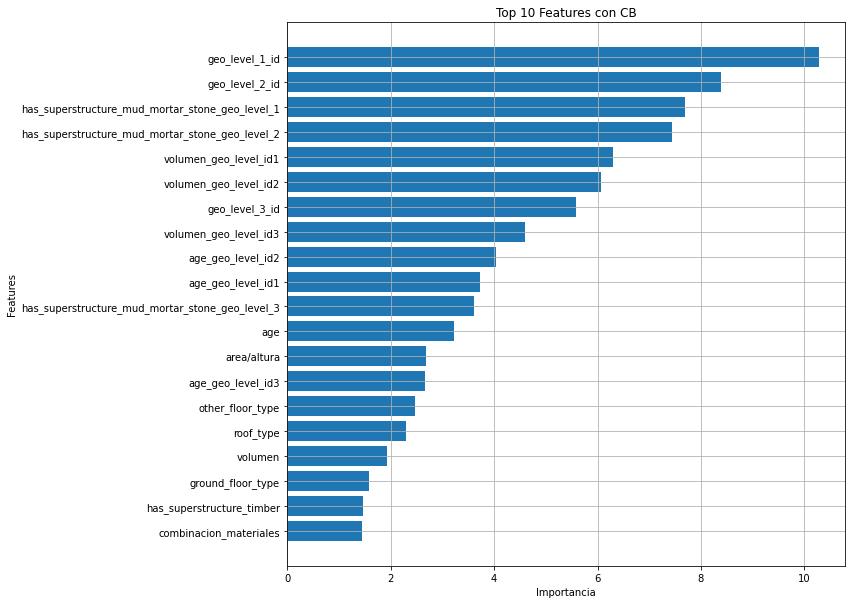

In [ ]:
sorted_idx = cb_clf.feature_importances_.argsort()
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.barh(X_train.columns[sorted_idx][32:52], cb_clf.feature_importances_[sorted_idx][32:52])
#plt.xticks(rotation=90)
plt.xlabel('Importancia')
plt.ylabel('Features')
plt.title('Top 10 Features con CB')
plt.grid(True)
plt.show()

#Pasamos geo level a categorical

In [ ]:
train_values_subset['geo_level_1_id'] = train_values_subset['geo_level_1_id'].astype('object')

In [ ]:
train_values_subset['geo_level_2_id'] = train_values_subset['geo_level_2_id'].astype('object')

In [ ]:
train_values_subset['geo_level_3_id'] = train_values_subset['geo_level_3_id'].astype('object')

In [ ]:
train_values_subset.dtypes

geo_level_1_id                                      object
geo_level_2_id                                      object
geo_level_3_id                                      object
count_floors_pre_eq                                  int64
age                                                  int64
area_percentage                                      int64
height_percentage                                    int64
land_surface_condition                              object
foundation_type                                     object
roof_type                                           object
ground_floor_type                                   object
other_floor_type                                    object
position                                            object
plan_configuration                                  object
has_superstructure_adobe_mud                         int64
has_superstructure_mud_mortar_stone                  int64
has_superstructure_stone_flag                        int

#Catboost con GridSearch

In [ ]:
pip install catboost

     |████████████████████████████████| 69.2 MB 4.4 kB/s 


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_values_subset, train_labels, test_size=0.3, random_state=2018)

In [ ]:
categorical_features_indices = np.where(X_train.dtypes =='object')[0]

In [ ]:
#Entreno con los mejores parametros que me dio el grid search
import catboost as cb
clf = cb.CatBoostClassifier(eval_metric="TotalF1", depth=10, iterations=500, l2_leaf_reg=9,
                            learning_rate=0.15, loss_function='MultiClass')

clf.fit(X_train, y_train,cat_features=categorical_features_indices)

0:	learn: 0.6917796	total: 3.68s	remaining: 30m 35s
1:	learn: 0.6892456	total: 7.24s	remaining: 30m 3s
2:	learn: 0.6936151	total: 11.2s	remaining: 31m 1s
3:	learn: 0.6952796	total: 15s	remaining: 31m 4s
4:	learn: 0.6959292	total: 18.5s	remaining: 30m 35s
5:	learn: 0.6956155	total: 22.4s	remaining: 30m 40s
6:	learn: 0.6967145	total: 25.8s	remaining: 30m 15s
7:	learn: 0.6970765	total: 29.7s	remaining: 30m 23s
8:	learn: 0.6987104	total: 33s	remaining: 30m 1s
9:	learn: 0.6990682	total: 36.6s	remaining: 29m 51s
10:	learn: 0.7035416	total: 40.7s	remaining: 30m 7s
11:	learn: 0.7078693	total: 43.6s	remaining: 29m 33s
12:	learn: 0.7114200	total: 47.5s	remaining: 29m 39s
13:	learn: 0.7146635	total: 50.5s	remaining: 29m 14s
14:	learn: 0.7171085	total: 53.8s	remaining: 28m 58s
15:	learn: 0.7184427	total: 56.9s	remaining: 28m 39s
16:	learn: 0.7193428	total: 1m	remaining: 28m 43s
17:	learn: 0.7208916	total: 1m 4s	remaining: 28m 41s
18:	learn: 0.7215529	total: 1m 7s	remaining: 28m 30s
19:	learn: 0.72

In [ ]:
from sklearn.metrics import f1_score

preds = clf.predict(X_test)
f1_score(y_test, preds, average='micro')

0.7493252836366893

En driven Data: 0,7475


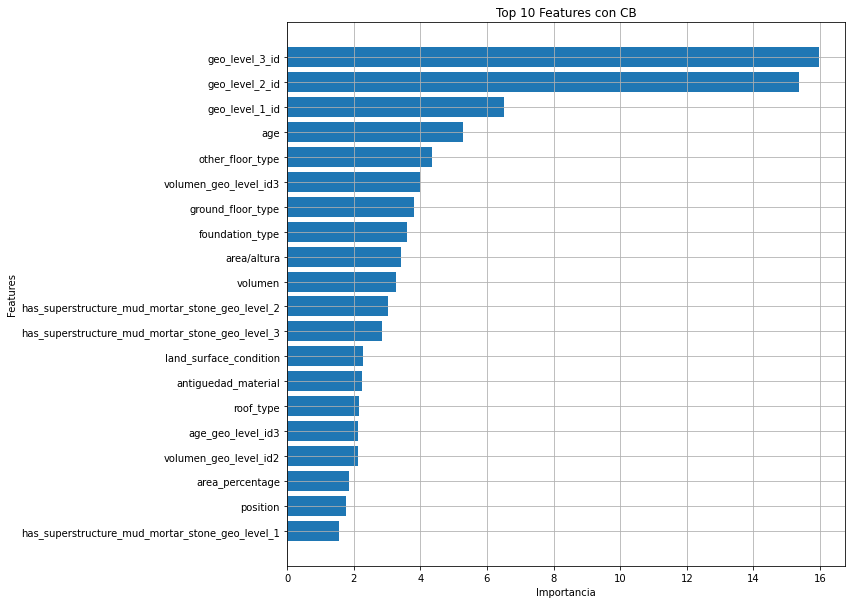

In [ ]:
sorted_idx = clf.feature_importances_.argsort()
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.barh(X_train.columns[sorted_idx][32:52], clf.feature_importances_[sorted_idx][32:52])
#plt.xticks(rotation=90)
plt.xlabel('Importancia')
plt.ylabel('Features')
plt.title('Top 10 Features con CB')
plt.grid(True)
plt.show()


#Entrega

In [ ]:
id='1GkhS3TIJdxEbdn2bfA9KMaK5t4KbkWzz'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('test_values.csv')

In [ ]:
test_values = pd.read_csv('test_values.csv', index_col='building_id')
test_values.tail()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
310028,4,605,3623,3,70,20,6,t,r,q,f,q,t,d,0,1,0,0,0,0,1,0,0,0,0,w,1,1,1,0,0,0,0,0,0,0,0,0
663567,10,1407,11907,3,25,6,7,n,r,n,f,q,s,d,1,1,1,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1049160,22,1136,7712,1,50,3,3,t,r,n,f,j,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
442785,6,1041,912,2,5,9,5,t,r,n,f,q,s,d,1,1,0,0,0,0,0,0,0,0,0,a,1,0,0,0,0,0,0,0,0,0,0,0
501372,26,36,6436,2,10,11,4,t,r,q,v,q,s,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_values_subset=test_values
#test_values_subset = pd.get_dummies(test_values_subset)
test_values_subset['volumen'] = test_values_subset['area_percentage']*test_values_subset['height_percentage']
test_values_subset['combinacion_materiales']=test_values_subset.iloc[:,7:18].sum(axis=1)

In [ ]:
test_values.sum()

geo_level_1_id                                                                      1206440
geo_level_2_id                                                                     61166202
geo_level_3_id                                                                    543946443
count_floors_pre_eq                                                                  185302
age                                                                                 2306360
area_percentage                                                                      696152
height_percentage                                                                    472223
land_surface_condition                    ttttttnttntttntttttttttntntnttntttttttttttottt...
foundation_type                           rrrrrrrrrrwrrrrrrrurrrrrrrrrurrwrrrrrrrrrrrrrh...
roof_type                                 nnnxqqnnnnqnnnxnnnnnnnnnxnnqnqnnnnnnnqnnnnnnnn...
ground_floor_type                         fffvffvffffvffvffffffxffvfffvfffffffff

In [ ]:
test_values_subset['combinacion_usos'] = test_values['has_secondary_use_agriculture']+\
test_values['has_secondary_use_hotel']+test_values['has_secondary_use_rental']+test_values['has_secondary_use_institution']+\
test_values['has_secondary_use_school']+test_values['has_secondary_use_industry']+\
test_values['has_secondary_use_health_post']+test_values['has_secondary_use_gov_office']+\
test_values['has_secondary_use_use_police']+test_values['has_secondary_use_other']

In [ ]:
test_values_subset['area/altura'] = test_values_subset['area_percentage']/test_values_subset['height_percentage']

In [ ]:
test_values_subset['antiguedad_material'] = test_values_subset['age']*test_values_subset['has_superstructure_mud_mortar_stone']

In [ ]:
test_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
300051,17,596,11307,3,20,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,42,1,0,1.166667,20
99355,6,141,11987,2,25,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0,65,1,1,2.600000,25
890251,22,19,10044,2,5,4,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,20,1,0,0.800000,5
745817,26,39,633,1,0,19,3,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0,57,0,1,6.333333,0
421793,17,289,7970,3,15,8,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,56,1,0,1.142857,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310028,4,605,3623,3,70,20,6,t,r,q,f,q,t,d,0,1,0,0,0,0,1,0,0,0,0,w,1,1,1,0,0,0,0,0,0,0,0,0,120,1,1,3.333333,70
663567,10,1407,11907,3,25,6,7,n,r,n,f,q,s,d,1,1,1,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,42,3,0,0.857143,25
1049160,22,1136,7712,1,50,3,3,t,r,n,f,j,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,9,1,0,1.000000,50


In [ ]:
p1 = test_values_subset.groupby(['geo_level_1_id'])['has_superstructure_mud_mortar_stone'].agg('mean')
test_values_subset = pd.merge(test_values_subset, p1.reset_index(),suffixes=["","_geo_level_1"], how='left', on=['geo_level_1_id'])

In [ ]:
p2 = test_values_subset.groupby(['geo_level_2_id'])['has_superstructure_mud_mortar_stone'].agg('mean')
test_values_subset = pd.merge(test_values_subset, p2.reset_index(),suffixes=["","_geo_level_2"], how='left', on=['geo_level_2_id'])

In [ ]:
p3 = test_values_subset.groupby(['geo_level_3_id'])['has_superstructure_mud_mortar_stone'].agg('mean')
test_values_subset = pd.merge(test_values_subset, p3.reset_index(),suffixes=["","_geo_level_3"], how='left', on=['geo_level_3_id'])

In [ ]:
test_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material,has_superstructure_mud_mortar_stone_geo_level_1,has_superstructure_mud_mortar_stone_geo_level_2,has_superstructure_mud_mortar_stone_geo_level_3
0,17,596,11307,3,20,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,42,1,0,1.166667,20,0.925255,0.977778,1.000000
1,6,141,11987,2,25,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0,65,1,1,2.600000,25,0.744447,1.000000,1.000000
2,22,19,10044,2,5,4,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,20,1,0,0.800000,5,0.892688,0.941176,0.750000
3,26,39,633,1,0,19,3,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0,57,0,1,6.333333,0,0.455801,0.039880,0.010526
4,17,289,7970,3,15,8,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,56,1,0,1.142857,15,0.925255,0.854839,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,4,605,3623,3,70,20,6,t,r,q,f,q,t,d,0,1,0,0,0,0,1,0,0,0,0,w,1,1,1,0,0,0,0,0,0,0,0,0,120,1,1,3.333333,70,0.978545,0.989583,1.000000
86864,10,1407,11907,3,25,6,7,n,r,n,f,q,s,d,1,1,1,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,42,3,0,0.857143,25,0.879508,0.885714,1.000000
86865,22,1136,7712,1,50,3,3,t,r,n,f,j,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,9,1,0,1.000000,50,0.892688,0.868852,1.000000
86866,6,1041,912,2,5,9,5,t,r,n,f,q,s,d,1,1,0,0,0,0,0,0,0,0,0,a,1,0,0,0,0,0,0,0,0,0,0,0,45,2,0,1.800000,5,0.744447,0.876190,0.906250


In [ ]:
a1 = test_values_subset.groupby(['geo_level_1_id'])['age'].agg('median')
test_values_subset = pd.merge(test_values_subset, a1.reset_index(), suffixes=["", "_geo_level_id1"], how='left', on=['geo_level_1_id'])

In [ ]:
test_values_subset['age_geo_level_id1'].value_counts()

15    43692
20    17505
10    14187
30     9384
25     2100
Name: age_geo_level_id1, dtype: int64

In [ ]:
a2 = test_values_subset.groupby(['geo_level_2_id'])['age'].agg('median')
test_values_subset = pd.merge(test_values_subset, a2.reset_index(), suffixes=["", "_geo_level_id2"], how='left', on=['geo_level_2_id'])

In [ ]:
test_values_subset['age_geo_level_id2'].value_counts()

15.0     28204
20.0     21724
10.0     15537
25.0      7952
30.0      3413
5.0       2638
22.5      1346
60.0      1177
17.5       914
12.5       832
35.0       774
65.0       732
50.0       421
45.0       360
27.5       278
40.0       154
995.0      110
7.5        100
32.5        72
37.5        34
85.0        24
47.5        22
42.5        18
52.5        12
55.0         7
70.0         4
0.0          4
62.5         2
80.0         2
95.0         1
Name: age_geo_level_id2, dtype: int64

In [ ]:
a3 = test_values_subset.groupby(['geo_level_3_id'])['age'].agg('median')
test_values_subset = pd.merge(test_values_subset, a3.reset_index(), suffixes=["", "_geo_level_id3"], how='left', on=['geo_level_3_id'])

In [ ]:
test_values_subset['age_geo_level_id3'].value_counts()

15.0     17545
10.0     15619
20.0     15175
25.0      8248
5.0       5928
30.0      4047
12.5      3398
17.5      3392
22.5      2246
35.0      1662
27.5      1418
7.5       1388
40.0      1090
50.0       633
45.0       578
32.5       574
80.0       468
0.0        366
37.5       338
60.0       329
100.0      320
55.0       237
47.5       232
995.0      216
42.5       210
2.5        202
90.0       183
65.0       170
70.0       164
85.0       164
52.5        74
95.0        59
75.0        53
57.5        36
67.5        20
120.0       14
517.5       10
62.5        10
512.5        8
507.5        8
505.0        6
510.0        6
77.5         6
72.5         4
200.0        3
500.0        2
117.5        2
502.5        2
145.0        2
110.0        1
180.0        1
105.0        1
Name: age_geo_level_id3, dtype: int64

In [ ]:
test_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material,has_superstructure_mud_mortar_stone_geo_level_1,has_superstructure_mud_mortar_stone_geo_level_2,has_superstructure_mud_mortar_stone_geo_level_3,age_geo_level_id1,age_geo_level_id2,age_geo_level_id3
0,17,596,11307,3,20,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,42,1,0,1.166667,20,0.925255,0.977778,1.000000,15,20.0,35.0
1,6,141,11987,2,25,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0,65,1,1,2.600000,25,0.744447,1.000000,1.000000,20,15.0,40.0
2,22,19,10044,2,5,4,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,20,1,0,0.800000,5,0.892688,0.941176,0.750000,20,20.0,7.5
3,26,39,633,1,0,19,3,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0,57,0,1,6.333333,0,0.455801,0.039880,0.010526,10,10.0,10.0
4,17,289,7970,3,15,8,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,56,1,0,1.142857,15,0.925255,0.854839,1.000000,15,20.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,4,605,3623,3,70,20,6,t,r,q,f,q,t,d,0,1,0,0,0,0,1,0,0,0,0,w,1,1,1,0,0,0,0,0,0,0,0,0,120,1,1,3.333333,70,0.978545,0.989583,1.000000,15,15.0,37.5
86864,10,1407,11907,3,25,6,7,n,r,n,f,q,s,d,1,1,1,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,42,3,0,0.857143,25,0.879508,0.885714,1.000000,15,15.0,25.0
86865,22,1136,7712,1,50,3,3,t,r,n,f,j,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,9,1,0,1.000000,50,0.892688,0.868852,1.000000,20,20.0,30.0
86866,6,1041,912,2,5,9,5,t,r,n,f,q,s,d,1,1,0,0,0,0,0,0,0,0,0,a,1,0,0,0,0,0,0,0,0,0,0,0,45,2,0,1.800000,5,0.744447,0.876190,0.906250,20,15.0,15.0


In [ ]:
v1 = test_values_subset.groupby(['geo_level_1_id'])['volumen'].agg('median')
test_values_subset = pd.merge(test_values_subset, v1.reset_index(), suffixes=["", "_geo_level_id1"], how='left', on=['geo_level_1_id'])

In [ ]:
v2 = test_values_subset.groupby(['geo_level_2_id'])['volumen'].agg('median')
test_values_subset = pd.merge(test_values_subset, v2.reset_index(), suffixes=["", "_geo_level_id2"], how='left', on=['geo_level_2_id'])

In [ ]:
v3 = test_values_subset.groupby(['geo_level_3_id'])['volumen'].agg('median')
test_values_subset = pd.merge(test_values_subset, v3.reset_index(), suffixes=["", "_geo_level_id3"], how='left', on=['geo_level_3_id'])

In [ ]:
test_values_subset.sum()

geo_level_1_id                                                                               1206440
geo_level_2_id                                                                              61166202
geo_level_3_id                                                                             543946443
count_floors_pre_eq                                                                           185302
age                                                                                          2306360
area_percentage                                                                               696152
height_percentage                                                                             472223
land_surface_condition                             ttttttnttntttntttttttttntntnttntttttttttttottt...
foundation_type                                    rrrrrrrrrrwrrrrrrrurrrrrrrrrurrwrrrrrrrrrrrrrh...
roof_type                                          nnnxqqnnnnqnnnxnnnnnnnnnxnnqnqnnnnnnnqnn

In [ ]:
test_values_subset

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,volumen,combinacion_materiales,combinacion_usos,area/altura,antiguedad_material,has_superstructure_mud_mortar_stone_geo_level_1,has_superstructure_mud_mortar_stone_geo_level_2,has_superstructure_mud_mortar_stone_geo_level_3,age_geo_level_id1,age_geo_level_id2,age_geo_level_id3,volumen_geo_level_id1,volumen_geo_level_id2,volumen_geo_level_id3
0,17,596,11307,3,20,7,6,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,42,1,0,1.166667,20,0.925255,0.977778,1.000000,15,20.0,35.0,40.0,48.0,45.0
1,6,141,11987,2,25,13,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0,65,1,1,2.600000,25,0.744447,1.000000,1.000000,20,15.0,40.0,45.0,42.0,35.0
2,22,19,10044,2,5,4,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,20,1,0,0.800000,5,0.892688,0.941176,0.750000,20,20.0,7.5,35.0,20.0,32.5
3,26,39,633,1,0,19,3,t,r,x,v,j,t,d,0,0,0,0,0,1,0,0,0,0,0,v,2,1,0,0,1,0,0,0,0,0,0,0,57,0,1,6.333333,0,0.455801,0.039880,0.010526,10,10.0,10.0,35.0,51.0,94.5
4,17,289,7970,3,15,8,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,56,1,0,1.142857,15,0.925255,0.854839,1.000000,15,20.0,15.0,40.0,49.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86863,4,605,3623,3,70,20,6,t,r,q,f,q,t,d,0,1,0,0,0,0,1,0,0,0,0,w,1,1,1,0,0,0,0,0,0,0,0,0,120,1,1,3.333333,70,0.978545,0.989583,1.000000,15,15.0,37.5,32.0,36.0,104.0
86864,10,1407,11907,3,25,6,7,n,r,n,f,q,s,d,1,1,1,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,42,3,0,0.857143,25,0.879508,0.885714,1.000000,15,15.0,25.0,30.0,28.0,42.0
86865,22,1136,7712,1,50,3,3,t,r,n,f,j,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,9,1,0,1.000000,50,0.892688,0.868852,1.000000,20,20.0,30.0,35.0,32.0,49.0
86866,6,1041,912,2,5,9,5,t,r,n,f,q,s,d,1,1,0,0,0,0,0,0,0,0,0,a,1,0,0,0,0,0,0,0,0,0,0,0,45,2,0,1.800000,5,0.744447,0.876190,0.906250,20,15.0,15.0,45.0,30.0,35.0


In [ ]:
test_values_subset['geo_level_1_id'] = test_values_subset['geo_level_1_id'].astype('object')

In [ ]:
test_values_subset['geo_level_2_id'] = test_values_subset['geo_level_2_id'].astype('object')

In [ ]:
test_values_subset['geo_level_3_id'] = test_values_subset['geo_level_3_id'].astype('object')

In [ ]:
#test_values_subset = pd.get_dummies(test_values_subset)

In [ ]:
predictions = clf_d.predict(test_values_subset)

In [ ]:
id='1m7BvONaXhc0stbfuOklP-JGpVND9AGVf'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('submission_format.csv')

In [ ]:
submission_format = pd.read_csv('submission_format.csv', index_col='building_id')
submission_format.tail()

,damage_grade
building_id,
310028,1
663567,1
1049160,1
442785,1
501372,1


In [ ]:
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [ ]:
my_submission.head()

,damage_grade
building_id,
300051,3
99355,2
890251,2
745817,1
421793,3


In [ ]:
my_submission.to_csv('submission.csv')